In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\mypc\Desktop\data science1\Time series\perrin-freres-monthly-champagne-.csv")


In [5]:
df.head()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.isnull().sum()


Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [7]:
df=df.dropna()


In [8]:
df.isnull().sum()


Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [9]:
df.columns=['Month','Sales']


In [10]:
df.head()


,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
df.describe()


,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [16]:
df['Month']= pd.to_datetime(df.Month)


In [15]:
df.head()


,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


<AxesSubplot:>

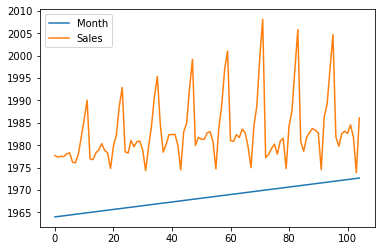

In [21]:
df.plot()


In [22]:
from statsmodels.tsa.stattools import adfuller


In [20]:
result=adfuller(df.Sales)


In [23]:
result

(-1.8335930563276235,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

# Diferencing

In [24]:
df['Salesdiff']=df['Sales']-df['Sales'].shift(1)


In [25]:
df.head()


,Month,Sales,Salesdiff
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,-143.0
2,1964-03-01,2755.0,83.0
3,1964-04-01,2721.0,-34.0
4,1964-05-01,2946.0,225.0


In [26]:
df['Salesdiff12']=df['Sales']-df['Sales'].shift(12)


In [27]:
df

,Month,Sales,Salesdiff,Salesdiff12
0,1964-01-01,2815.0,NaN,NaN
1,1964-02-01,2672.0,-143.0,NaN
2,1964-03-01,2755.0,83.0,NaN
3,1964-04-01,2721.0,-34.0,NaN
4,1964-05-01,2946.0,225.0,NaN
...,...,...,...,...
100,1972-05-01,4618.0,-170.0,-392.0
101,1972-06-01,5312.0,694.0,438.0
102,1972-07-01,4298.0,-1014.0,-335.0
103,1972-08-01,1413.0,-2885.0,-246.0


In [28]:
df=df.dropna()


<AxesSubplot:>

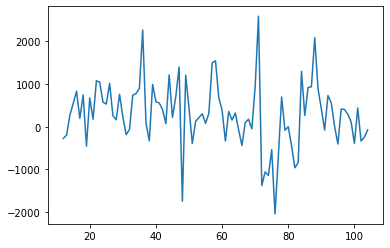

In [29]:
df.Salesdiff12.plot()


<AxesSubplot:>

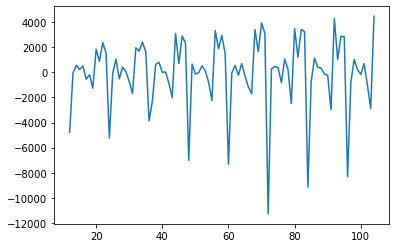

In [30]:
df.Salesdiff.plot()


In [31]:
adfuller(df.Salesdiff12)


(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


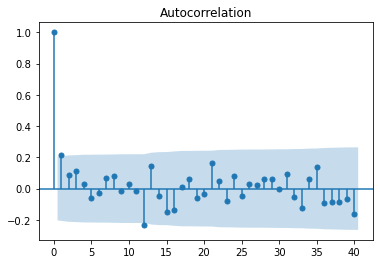

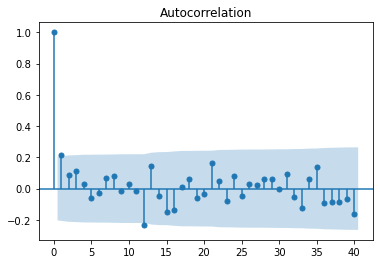

In [33]:
plot_acf(df.Salesdiff12,lags=40)


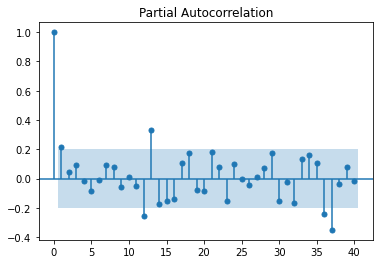

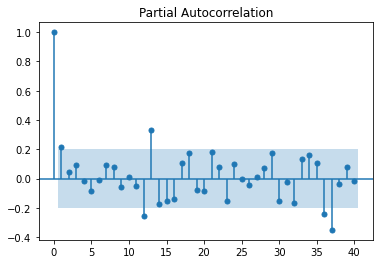

In [34]:
plot_pacf(df.Salesdiff12,lags=40)


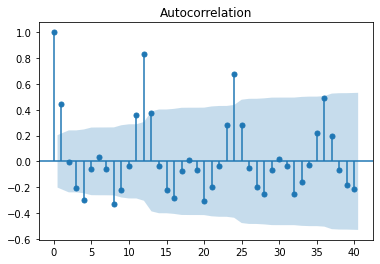

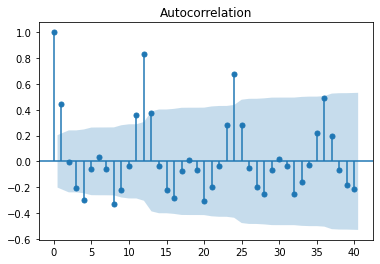

In [35]:
plot_acf(df.Sales,lags=40)


In [36]:
df


,Month,Sales,Salesdiff,Salesdiff12
12,1965-01-01,2541.0,-4771.0,-274.0
13,1965-02-01,2475.0,-66.0,-197.0
14,1965-03-01,3031.0,556.0,276.0
15,1965-04-01,3266.0,235.0,545.0
16,1965-05-01,3776.0,510.0,830.0
...,...,...,...,...
100,1972-05-01,4618.0,-170.0,-392.0
101,1972-06-01,5312.0,694.0,438.0
102,1972-07-01,4298.0,-1014.0,-335.0
103,1972-08-01,1413.0,-2885.0,-246.0


In [37]:
from statsmodels.tsa.arima_model import ARIMA


In [38]:
model=ARIMA(df.Sales,order=(1,1,1))
model_fit= model.fit()

C:\Users\mypc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mypc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fore

In [39]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   92
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -845.250
Method:                       css-mle   S.D. of innovations           2319.065
Date:                Fri, 19 Mar 2021   AIC                           1698.501
Time:                        10:40:37   BIC                           1708.588
Sample:                             1   HQIC                          1702.572
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            20.4629     15.493      1.321      0.187      -9.902      50.828
ar.L1.D.Sales     0.4358      0.095      4.581      0.000       0.249       0.622
ma.L1.D.Sales    -1.0000      0.029    -34.462      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2946           +0.0000j            2.2946            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

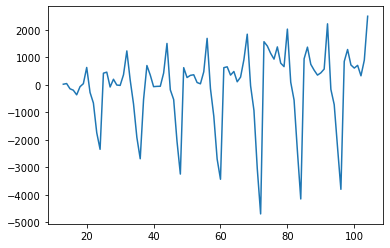

In [40]:
model_fit.predict().plot()


<AxesSubplot:>

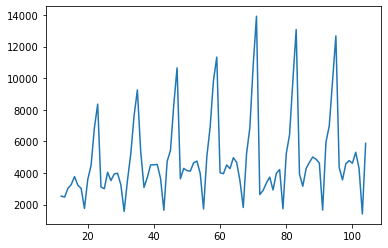

In [41]:
df.Sales.plot()


In [42]:
import statsmodels.api as sm 
model=sm.tsa.statespace.SARIMAX(df.Sales,order=(1,1,1),seasonal_order=(1,1,1,12))


C:\Users\mypc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\mypc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [43]:
results=model.fit()


In [44]:
a=results.predict()


<AxesSubplot:>

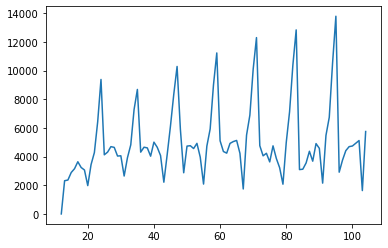

In [45]:
a.plot()
